Во овој проект се врши предвидување за тоа дали човекот има Корона вирус врз основа на симптомите кои ги има.
Линк до датасетот: https://www.kaggle.com/datasets/iamhungundji/covid19-symptoms-checker

Изработила: Викторија Стаменова

#Импортирање на библиотеки и датасет

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Cleaned-Data.csv')

Преглед на првите 5 редици од датасетот

In [3]:
data.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


#1. Предпроцесирање на податоците


Проверка за null вредности

In [4]:
missing_values = data.isnull().sum()
missing_values

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
Country                    0
dtype: int64

Енкодирање на единствената категориска променлива во датасетот

In [ ]:
le = LabelEncoder()
data['Country']= le.fit_transform(data['Country'])

In [ ]:
data.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,0
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,0
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,0
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,0
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,0


#2. Exploratory Data Analysis & Clustering

Основни информации за датасетот

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Fever                    316800 non-null  int64
 1   Tiredness                316800 non-null  int64
 2   Dry-Cough                316800 non-null  int64
 3   Difficulty-in-Breathing  316800 non-null  int64
 4   Sore-Throat              316800 non-null  int64
 5   None_Sympton             316800 non-null  int64
 6   Pains                    316800 non-null  int64
 7   Nasal-Congestion         316800 non-null  int64
 8   Runny-Nose               316800 non-null  int64
 9   Diarrhea                 316800 non-null  int64
 10  None_Experiencing        316800 non-null  int64
 11  Age_0-9                  316800 non-null  int64
 12  Age_10-19                316800 non-null  int64
 13  Age_20-24                316800 non-null  int64
 14  Age_25-59                316800 non-

Од кои колони се состои датасетот

In [ ]:
data.columns

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Country'],
      dtype='object')

Како target променлива е земена колоната Severity_None и е прикажана нејзината распределба


In [ ]:
data['Severity_None'].value_counts()

0    237600
1     79200
Name: Severity_None, dtype: int64

Од овде може да заклучиме дека датасетот не е балансиран

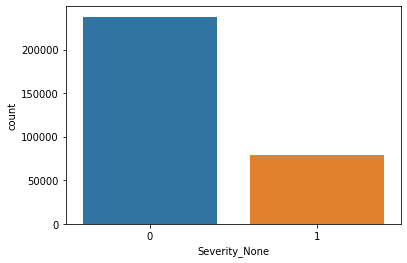

In [ ]:
sns.countplot(x=data['Severity_None'])

Heatmap за приказ на зависностите и поврзаноста на променливите

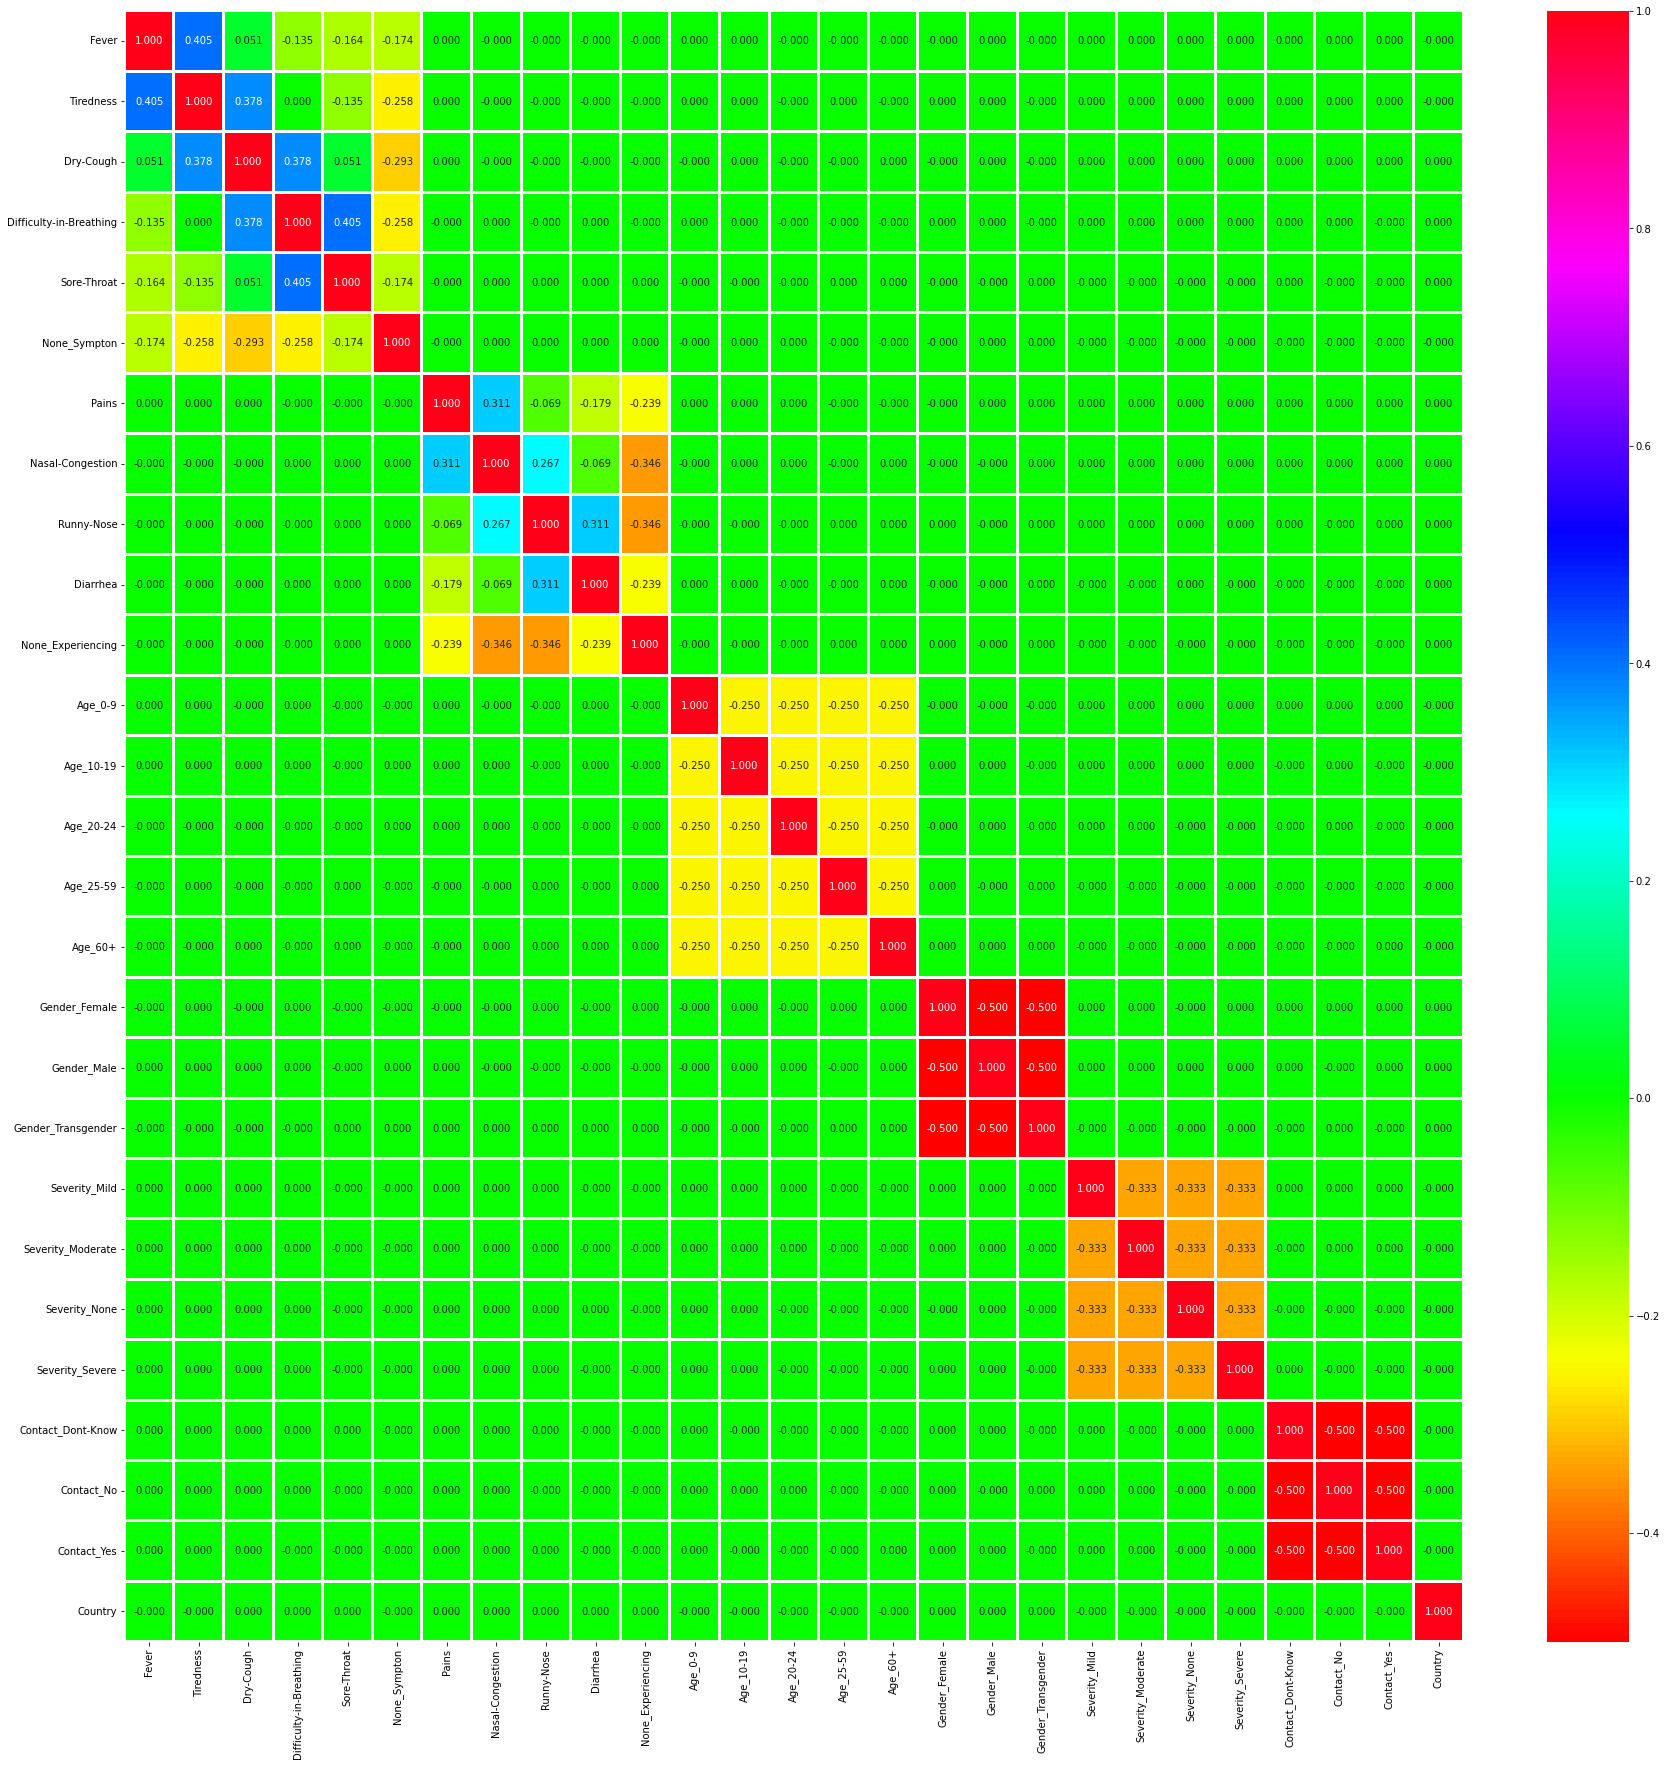

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


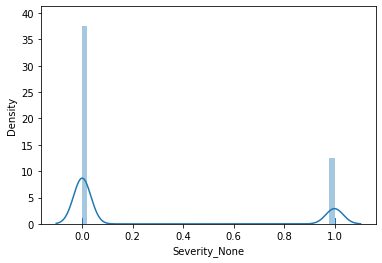

In [ ]:
sns.distplot(data['Severity_None'],rug=True)
plt.show()

Дистрибуција на променливите Contact

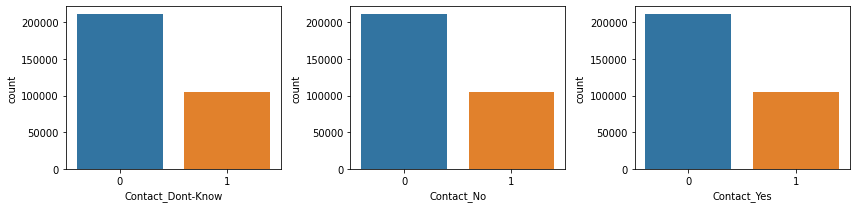

In [ ]:
contact_list = ['Contact_Dont-Know', 'Contact_No', 'Contact_Yes']

fit = plt.figure(figsize=(12, 3))
for i in range(len(contact_list)):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=contact_list[i], data=data)
plt.tight_layout()

Countplot за променливата Country од кој може да се забележи дека од секоја држава има земено ист број на примероци

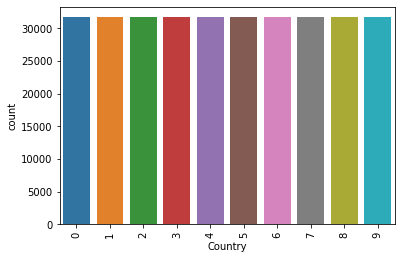

In [ ]:
sns.countplot(x='Country', data=data)
plt.xticks(rotation=90)
plt.show()

Поделба на множеството

In [ ]:
X = data.drop(['Severity_Mild','Severity_Moderate','Severity_None','Severity_Severe'], axis=1)

#target column
Y = data['Severity_None']

In [ ]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
316795    0
316796    0
316797    1
316798    1
316799    1
Name: Severity_None, Length: 316800, dtype: int64

Наоѓање на минималниот број на кластери користејќи K-Means Clustering

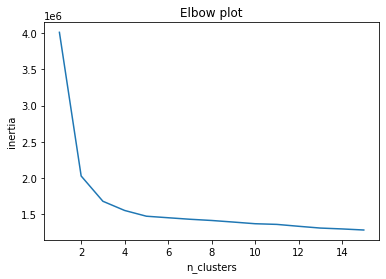

In [ ]:
inertia_list = []

for i in range(1, 16):
   km = KMeans(n_clusters=i)
   km.fit(X)
   inertia_list.append(km.inertia_)

plt.plot(np.arange(1, 16), inertia_list)
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.title('Elbow plot')
plt.show()

Од графикот следува дека бројот на кластери треба да биде 3

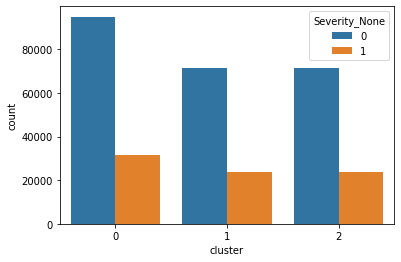

In [ ]:
km = KMeans(n_clusters=3)
km.fit(X)
X['cluster'] = km.predict(X)

sns.countplot(x='cluster', data=X, hue=Y)
plt.show()

Поделба на датасетот на train i test

In [ ]:
X = data.drop(['Severity_Mild','Severity_Moderate','Severity_None','Severity_Severe'], axis=1)
Y = data.iloc[:,-6:-5]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape

(253440, 23)

In [ ]:
Y_train.shape

(253440, 1)

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

#3. Креирање на модели со XGB и невронски мрежи

model1 - Класификација со XGBClassifier

In [ ]:
from xgboost import XGBClassifier

model1 = XGBClassifier(max_depth=10, min_child_weight=1,  n_estimators=200, n_jobs=-1 , verbose=1, learning_rate=0.2)

model1.fit(X_train, Y_train)

y_pred1 = model1.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Евалуација на model1

In [ ]:
print("Accuracy of model1: ", metrics.accuracy_score(Y_test, y_pred1)*100)

Accuracy of model1:  74.80587121212122


In [ ]:
print(confusion_matrix(Y_test, y_pred1))
print(classification_report(Y_test, y_pred1))

[[47397   236]
 [15727     0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     47633
           1       0.00      0.00      0.00     15727

    accuracy                           0.75     63360
   macro avg       0.38      0.50      0.43     63360
weighted avg       0.56      0.75      0.64     63360



model2 - Класификација со невронски мрежи

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model2 = Sequential()
model2.add(Dense(32, input_dim=23, kernel_initializer = 'uniform', activation='relu'))
model2.add(Dense(16,kernel_initializer = 'uniform', activation='relu'))
model2.add(Dense(16,kernel_initializer = 'uniform', activation='relu'))
model2.add(Dense(8,kernel_initializer = 'uniform', activation='relu'))
model2.add(Dense(1, kernel_initializer = 'uniform',activation='sigmoid'))

In [ ]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model2.fit(X_train, Y_train, epochs=20, batch_size=10)

Epoch 1/20
25344/25344 [==============================] - 54s 2ms/step - loss: 0.5642 - accuracy: 0.7495
Epoch 2/20
25344/25344 [==============================] - 50s 2ms/step - loss: 0.5631 - accuracy: 0.7496
Epoch 3/20
25344/25344 [==============================] - 51s 2ms/step - loss: 0.5631 - accuracy: 0.7496
Epoch 4/20
25344/25344 [==============================] - 52s 2ms/step - loss: 0.5630 - accuracy: 0.7496
Epoch 5/20
25344/25344 [==============================] - 49s 2ms/step - loss: 0.5630 - accuracy: 0.7496
Epoch 6/20
25344/25344 [==============================] - 49s 2ms/step - loss: 0.5629 - accuracy: 0.7496
Epoch 7/20
25344/25344 [==============================] - 49s 2ms/step - loss: 0.5629 - accuracy: 0.7496
Epoch 8/20
25344/25344 [==============================] - 49s 2ms/step - loss: 0.5629 - accuracy: 0.7496
Epoch 9/20
25344/25344 [==============================] - 49s 2ms/step - loss: 0.5629 - accuracy: 0.7496
Epoch 10/20
25344/25344 [==============================

In [ ]:
y_pred2 = model2.predict(X_test)

In [ ]:
y_pred2 = y_pred2.round()
y_pred2

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

Евалуација на model2

In [ ]:
print("Accuracy of model2:",metrics.accuracy_score(Y_test, y_pred2)*100)

Accuracy of model2: 75.17834595959596


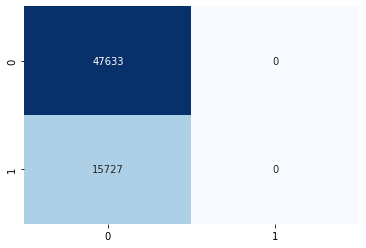

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred2.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(Y_test, y_pred2.round())


In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

model3 - Класификација со помош на advanced neural networks

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model3 = Sequential()
model3.add(LSTM(100,  activation='relu', return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))
model3.add(LSTM(50, activation='relu'))
model3.add(Dense(1))

In [ ]:
 model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model3.fit(X_train, Y_train, epochs=8, batch_size=64, validation_split=0.2, verbose=2, shuffle=False)

Epoch 1/8
3168/3168 - 26s - loss: 2.9832e-08 - accuracy: 0.7498 - val_loss: 2.9950e-08 - val_accuracy: 0.7488 - 26s/epoch - 8ms/step
Epoch 2/8
3168/3168 - 22s - loss: 2.9832e-08 - accuracy: 0.7498 - val_loss: 2.9950e-08 - val_accuracy: 0.7488 - 22s/epoch - 7ms/step
Epoch 3/8
3168/3168 - 14s - loss: 2.9832e-08 - accuracy: 0.7498 - val_loss: 2.9950e-08 - val_accuracy: 0.7488 - 14s/epoch - 5ms/step
Epoch 4/8
3168/3168 - 14s - loss: 2.9832e-08 - accuracy: 0.7498 - val_loss: 2.9950e-08 - val_accuracy: 0.7488 - 14s/epoch - 5ms/step
Epoch 5/8
3168/3168 - 13s - loss: 2.9832e-08 - accuracy: 0.7498 - val_loss: 2.9950e-08 - val_accuracy: 0.7488 - 13s/epoch - 4ms/step
Epoch 6/8
3168/3168 - 15s - loss: 2.9832e-08 - accuracy: 0.7498 - val_loss: 2.9950e-08 - val_accuracy: 0.7488 - 15s/epoch - 5ms/step
Epoch 7/8
3168/3168 - 13s - loss: 2.9832e-08 - accuracy: 0.7498 - val_loss: 2.9950e-08 - val_accuracy: 0.7488 - 13s/epoch - 4ms/step
Epoch 8/8
3168/3168 - 15s - loss: 2.9832e-08 - accuracy: 0.7498 - val

In [ ]:
y_pred3 = model3.predict(X_test)

In [ ]:
y_pred3=y_pred3.round()
y_pred3

array([[ 0.],
       [ 0.],
       [ 0.],
       ...,
       [-0.],
       [ 0.],
       [ 0.]], dtype=float32)

Евалуација на model3

In [ ]:
print("Accuracy of model3:",metrics.accuracy_score(Y_test, y_pred3)*100)

Accuracy of model3: 75.17834595959596


#4. Најдобар модел

За проценка на перформансите на моделите користена е метриката Accuracy според која првиот модел има точност од 74.81%, а останатите два модели кои се креирани со помош на невронски мрежи имаат иста вредност за оваа метрика и тоа 75.18%.  Со ова може да заклучиме дека во овој случај моделите со невронски мрежи се за нијанса подобри од XGB класификаторот.

#5. Визуелизација на резултатите

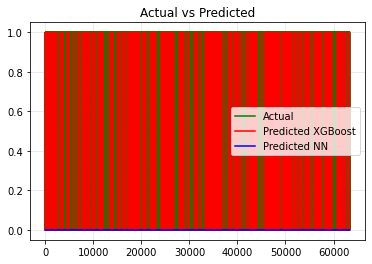

In [ ]:
plt.plot(Y_test, color = 'green', label = 'Actual')
plt.plot(y_pred1, color = 'red', label = 'Predicted XGBoost')
plt.plot(y_pred2, color = 'blue', label = 'Predicted NN')

plt.grid(alpha = 0.3)
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

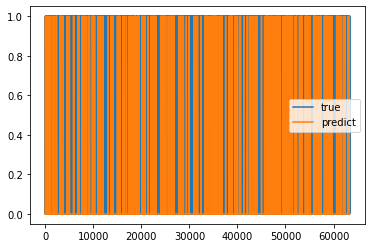

In [ ]:
plt.plot(Y_test, label='true')
plt.plot(y_pred1, label='predict')
plt.legend()
plt.show()

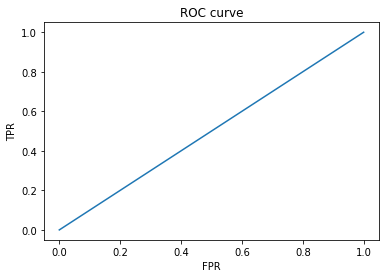

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred2)
opt_threshold = thresholds[np.argmax(tpr - fpr)]

plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()